In [1]:
from flash_order import *
from matplotlib.ticker import MaxNLocator

In [2]:
foc_0050 = FlashOrderCalculator('0050')

2022-11-27 04:16:00.898 | INFO     | get_data.py         :   36 | Got cache at /Users/anthonywah/Projects/mafs6100-order-placement-strategy/cache/0050.pkl - 8.25s


In [3]:
foc_0050.classify(max_dur_ms=100)

ClassifyingFlashOrder: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:10<00:00, 16.97it/s]


In [4]:
len(foc_0050.fod[100])

8398

Text(0.5, 1.0, 'distribution of flickering duration')

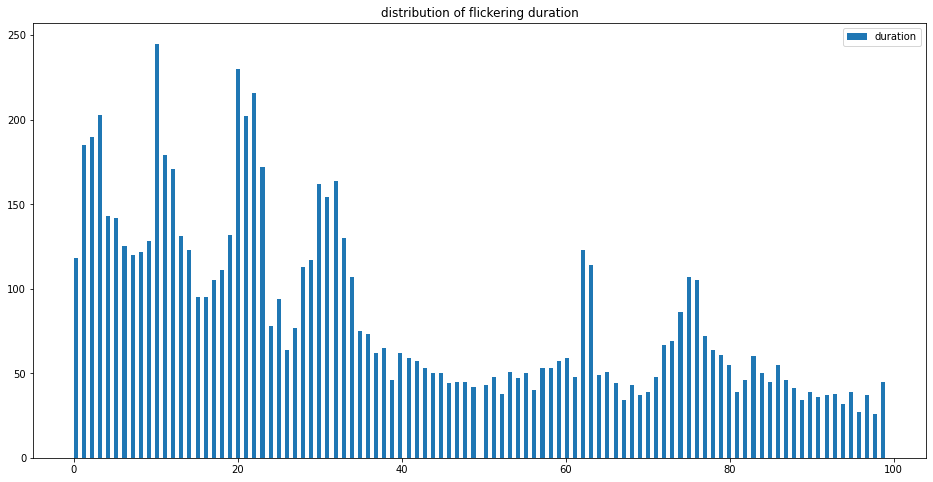

In [5]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['duration'] for i in foc_0050.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

Text(0.5, 1.0, 'distribution of flickering duration')

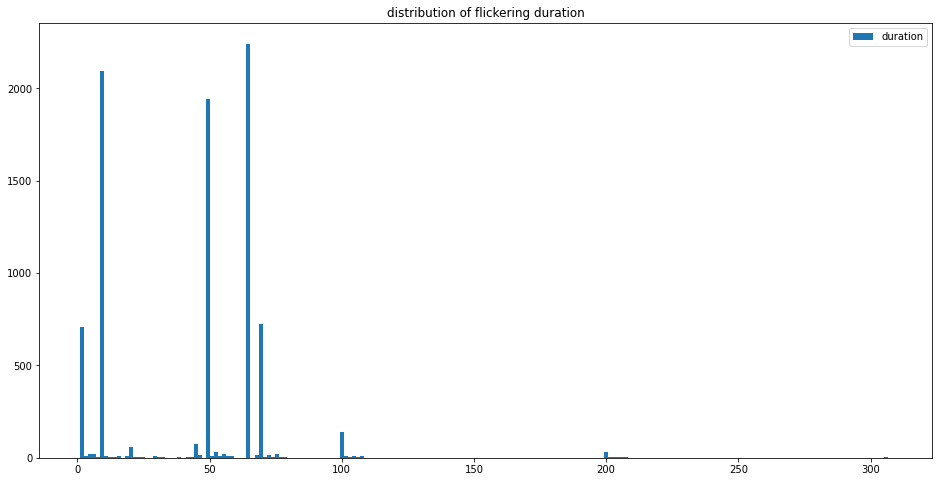

In [6]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['fo_qty'] for i in foc_0050.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

Text(0.5, 1.0, 'distribution of flickering duration')

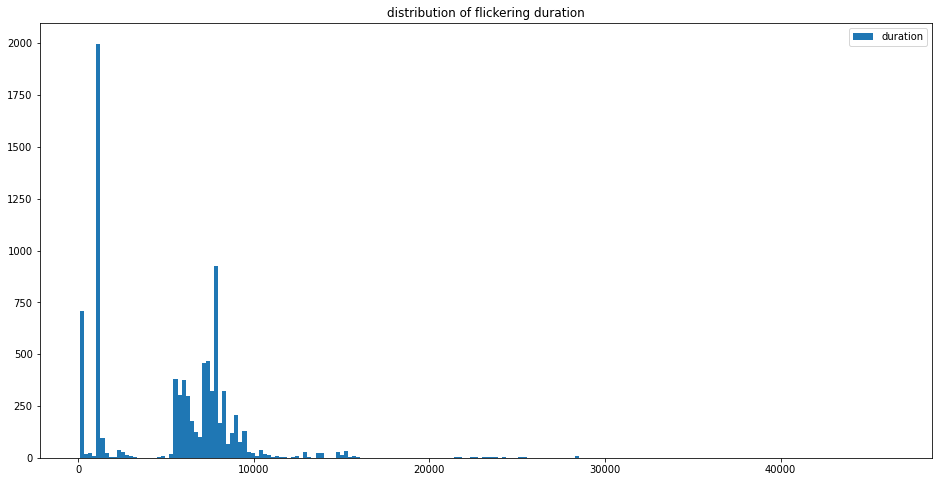

In [7]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['fo_qty'] * i['fo_price']/100 for i in foc_0050.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

MatchingFlashOrderIndex: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8398/8398 [00:00<00:00, 45878.14it/s]


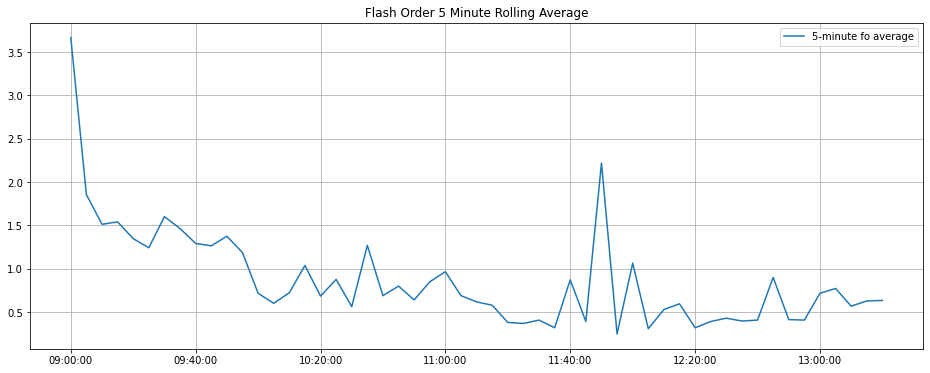

In [8]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc_0050.data_gb.items()}

for case in tqdm.tqdm(foc_0050.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc_0050.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '5m_bin'] = all_df['dt'].dt.floor(freq='5min').dt.time.astype(str)
df_bin = all_df.groupby('5m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 5 Minute Rolling Average')
ax.plot(df_bin['5m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='5-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

MatchingFlashOrderIndex: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8398/8398 [00:00<00:00, 70564.24it/s]


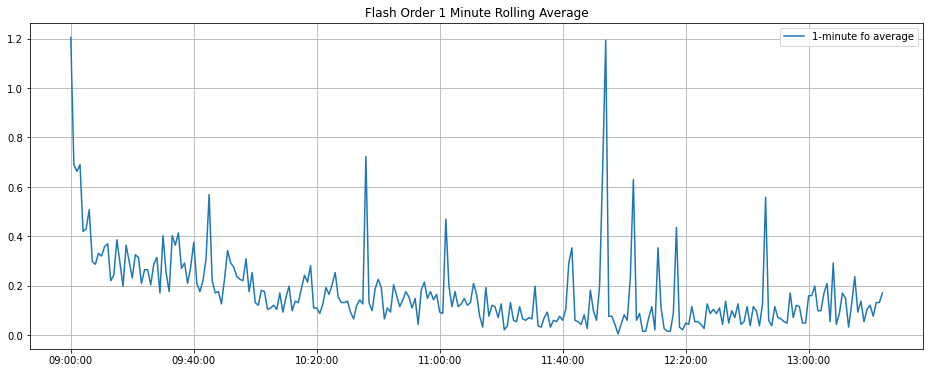

In [9]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc_0050.data_gb.items()}

for case in tqdm.tqdm(foc_0050.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc_0050.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '1m_bin'] = all_df['dt'].dt.floor(freq='1min').dt.time.astype(str)
df_bin = all_df.groupby('1m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 1 Minute Rolling Average')
ax.plot(df_bin['1m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='1-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

### 0050 Tricked trades

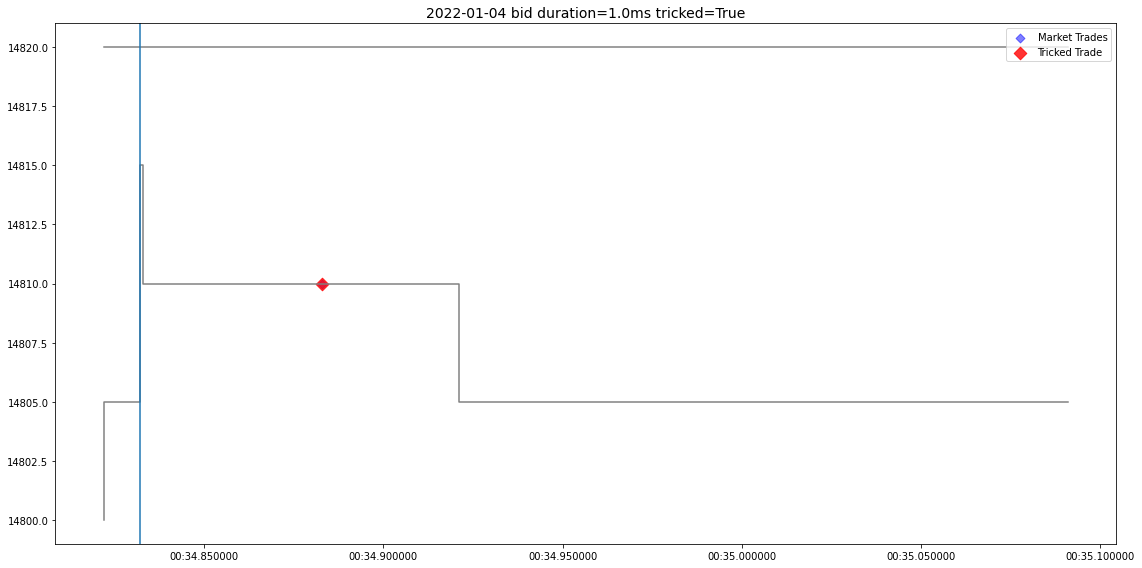

In [11]:
foc_0050.plot_quote(100, 17)

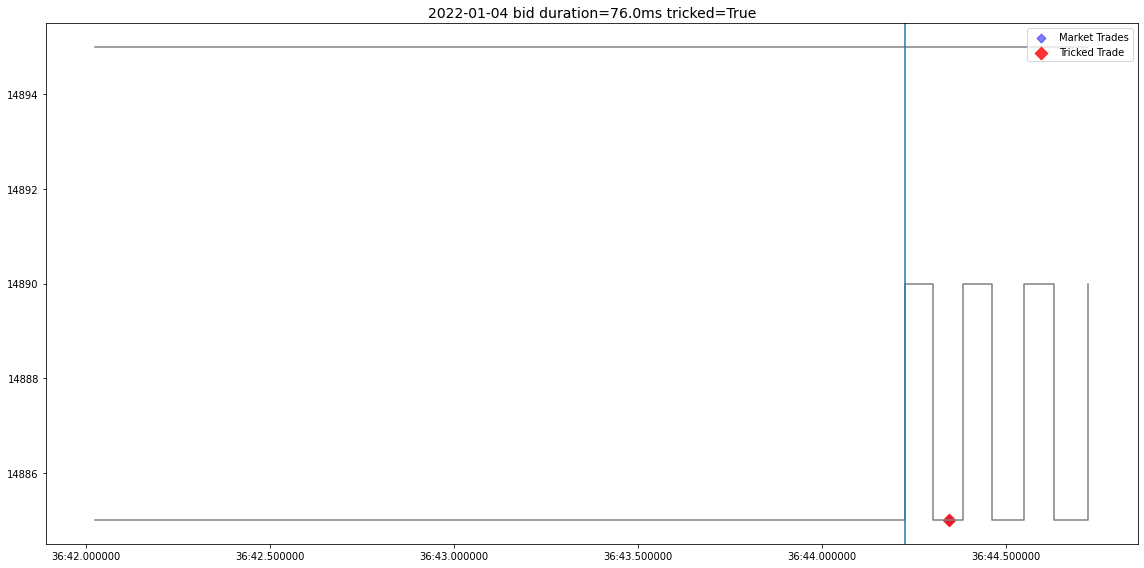

In [12]:
foc_0050.plot_quote(100, 162)

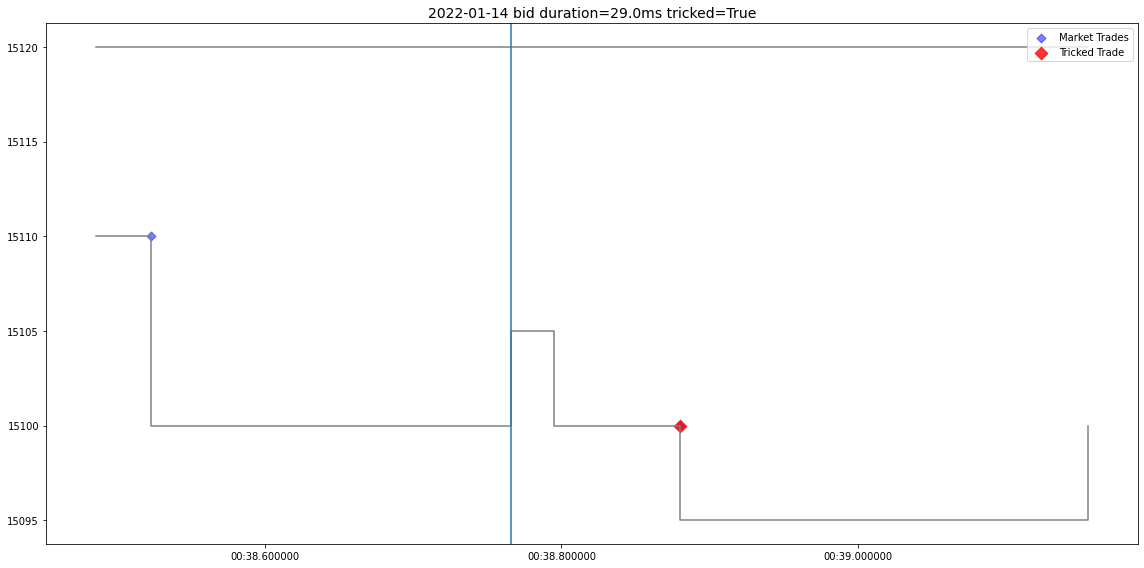

In [13]:
foc_0050.plot_quote(100, 430)

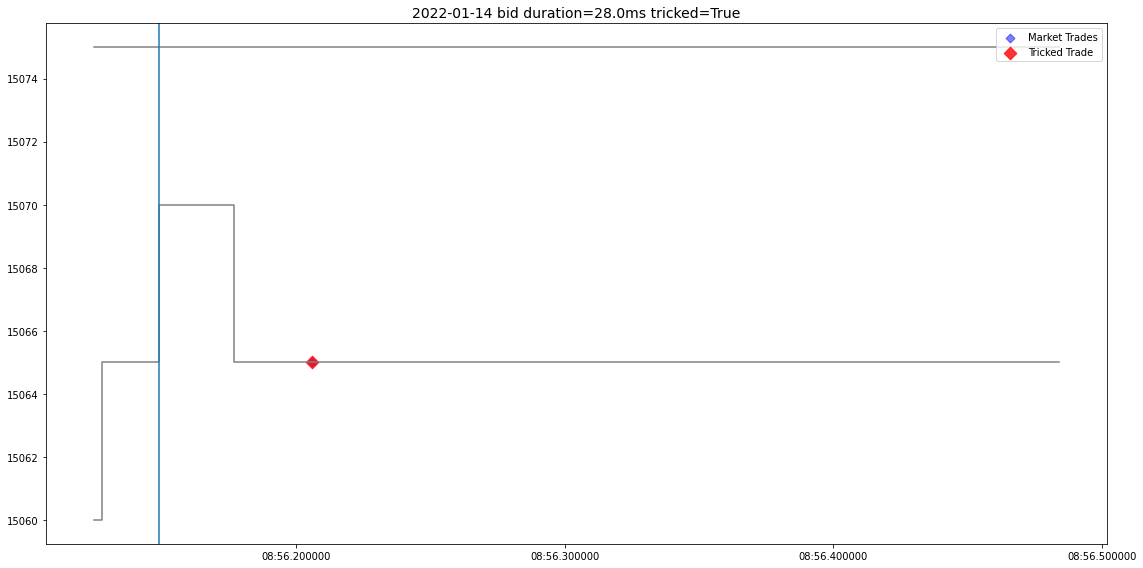

In [14]:
foc_0050.plot_quote(100, 445)

In [ ]:
foc_2330 = FlashOrderCalculator('2330')

In [ ]:
foc_2330.classify(max_dur_ms=100)

In [ ]:
len(foc_2330.fod[100])

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['duration'] for i in foc_2330.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['fo_qty'] for i in foc_2330.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['fo_qty'] * i['fo_price'] / 100 for i in foc_2330.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('distribution of flickering duration')

In [ ]:
foc_2330.fod[100][2]

In [ ]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc_2330.data_gb.items()}

for case in tqdm.tqdm(foc_2330.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc_2330.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '5m_bin'] = all_df['dt'].dt.floor(freq='5min').dt.time.astype(str)
df_bin = all_df.groupby('5m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 5 Minute Rolling Average')
ax.plot(df_bin['5m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='5-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
one_all_df = all_df.loc[all_df['5m_bin'] == '11:15:00'].sort_values('date')
gb_df = one_all_df.groupby('date')['IS_FO'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(gb_df['date'], gb_df['IS_FO'], label='5-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
gb_df['IS_FO'].idxmax()

In [ ]:
gb_df.loc[121]

In [ ]:
cases = [i for i in range(len(foc_2330.fod[100])) if foc_2330.fod[100][i]['date'] == '2022-07-07']

In [ ]:
len(cases)

In [ ]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc_2330.data_gb.items()}

for case in tqdm.tqdm(foc_2330.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc_2330.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '1m_bin'] = all_df['dt'].dt.floor(freq='1min').dt.time.astype(str)
df_bin = all_df.groupby('1m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 1 Minute Rolling Average')
ax.plot(df_bin['1m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='1-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()